# ***Exercício 2***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='mse')

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=0)

In [13]:
y_pred_nn = model.predict(X_test).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
print(f"🔹 Rede Neural (Keras) - RMSE: {rmse_nn:.4f}, MAE: {mae_nn:.4f}")


🔹 Rede Neural (Keras) - RMSE: 0.5243, MAE: 0.3537


Modelo Scikit-learn

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [16]:
print(f"🔹 Linear Regression - RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}")

🔹 Linear Regression - RMSE: 0.7456, MAE: 0.5332


Comparação

In [17]:
models = ['Keras NN', 'Linear Regression']
rmse_scores = [rmse_nn, rmse_lr]

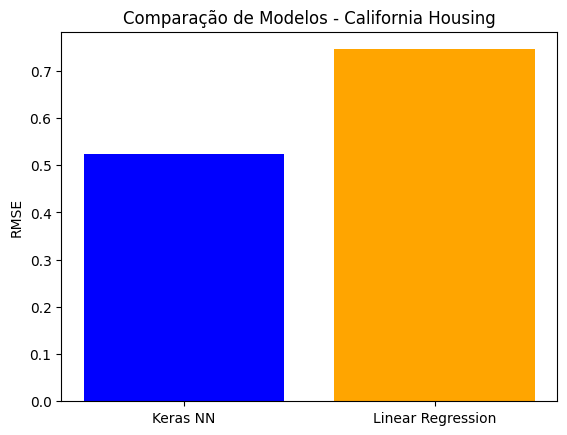

In [18]:
plt.bar(models, rmse_scores, color=['blue', 'orange', 'green'])
plt.ylabel("RMSE")
plt.title("Comparação de Modelos - California Housing")
plt.show()